In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import os

In [3]:
# Read dataset
df = pd.read_csv('archive/eda_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [4]:
df.shape

(742, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [6]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [7]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*25)

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64
***************************************************************************
$49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$74K-$124K (Glassdoor est.)         5
                                   ..
$74K-$119K (Glassdoor est.)         1
$55K-$97K (Glassdoor est.)          1
$15K-$16K(Employer est.)            1
$61K-$106K (Glassdoor est.)         1
$62K-$113K (Glassdoor est.)         1
Name: Salary Estimate, Length: 416

In [8]:
df = df.replace([-1, "-1", "Unknown", "Unknown / Non-Applicable", "na"], np.nan)


Missing/Unknown Values:
 Job Title              0
Salary Estimate        0
Job Description        0
Rating                11
Company Name           0
Location               0
Headquarters           1
Size                  10
Founded               50
Type of ownership      2
Industry              10
Sector                10
Revenue              204
Competitors          460
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                   50
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp             184
seniority            520
desc_len               0
num_comp               0
dtype: int64


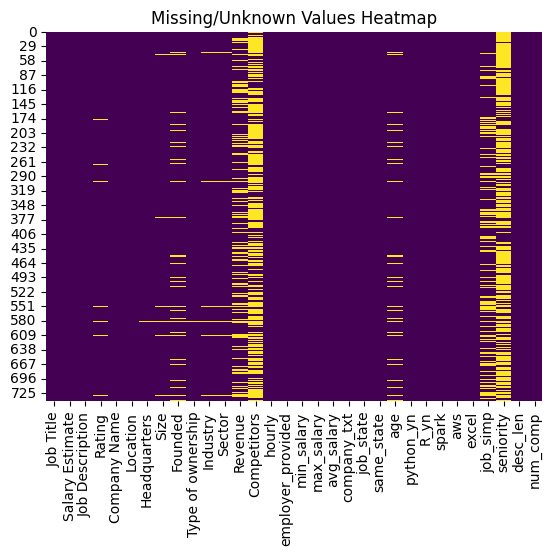

In [9]:
print("\nMissing/Unknown Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing/Unknown Values Heatmap")
plt.show()

In [10]:
df.duplicated().sum()

275

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
x=df.drop(columns=['Salary Estimate', 'min_salary', 'max_salary', 'avg_salary'])
x.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,...,47.0,1,0,0,0,1,data scientist,NaN,2536,0
1,Healthcare Data Scientist,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,...,36.0,1,0,0,0,0,data scientist,NaN,4783,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,...,10.0,1,0,1,0,1,data scientist,NaN,3461,0
3,Data Scientist,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,...,55.0,1,0,0,0,0,data scientist,NaN,3883,3
4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,...,22.0,1,0,0,0,1,data scientist,NaN,2728,3


In [13]:
y=df['avg_salary']
y.head()

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: avg_salary, dtype: float64

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42
# )
# 60% train, 20% validation, 20% test
x_trainval, x_test, y_trainval, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval, y_trainval, test_size=0.25, random_state=42
)
# copies avoid SettingWithCopy warnings
x_train = x_train.copy()
x_val = x_val.copy()
x_test = x_test.copy()

num_cols = x_train.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train[num_cols])

x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
x_test.loc[:, num_cols] = imputer.transform(x_test[num_cols])

cat_cols = x_train.select_dtypes(include='object').columns
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_val = pd.get_dummies(x_val, columns=cat_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)

# align validation/test columns with the training design matrix
x_val = x_val.reindex(columns=x_train.columns, fill_value=0)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

os.makedirs('archive/train', exist_ok=True)
os.makedirs('archive/val', exist_ok=True)
os.makedirs('archive/test', exist_ok=True)

x_train.to_csv('archive/train/x_train.csv', index=False)
x_val.to_csv('archive/val/x_val.csv', index=False)   # ensure archive/val exists
x_test.to_csv('archive/test/x_test.csv', index=False)
y_train.to_csv('archive/train/y_train.csv', index=False)
y_val.to_csv('archive/val/y_val.csv', index=False)   # ensure archive/val exists
y_test.to_csv('archive/test/y_test.csv', index=False)

C:\Users\DMX\AppData\Local\Temp\ipykernel_13116\512232982.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_13116\512232982.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_13116\512232982.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a n

In [15]:
# imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

# imputer.fit(x.select_dtypes(include='number'))
# x.loc[:, x.select_dtypes(include='number').columns] = imputer.transform(x[x.select_dtypes(include='number').columns])
# x

In [16]:
# categorical_features = x.select_dtypes(include=['object']).columns
# dummy=pd.get_dummies(x, columns=categorical_features, drop_first=True)
# dummy

In [17]:
# x_train,x_test,y_train,y_test=train_test_split(dummy,y,test_size=0.2,random_state=42)
# x_train.to_csv("archive/train/x_train.csv", index=False)
# x_test.to_csv("archive/test/x_test.csv", index=False)
# y_train.to_csv("archive/train/y_train.csv", index=False)
# y_test.to_csv("archive/test/y_test.csv", index=False)